# Freecodecamp Project : Time Series Visualizer
### From Data Aanalysis with Python course

#### Importing the libraries necessary for the project

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import dates as mpl_dates

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [53]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates = ["date"], index_col = "date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [57]:
df.isna()

,value
date,
2016-05-09,False
2016-05-10,False
2016-05-11,False
2016-05-12,False
2016-05-13,False
...,...
2019-11-29,False
2019-11-30,False
2019-12-01,False


There are no NaN values in the dataframe. 

In [58]:
#Types of data
df.dtypes

value    int64
dtype: object

Date is as an object. We need to convert it to a datetime type:

In [59]:
#df['date'] = pd.to_datetime(df['date'])
#df.dtypes

#### Clean data
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [60]:
#Before applying the filter, just visualzing some statistics on the data:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


There are 1238 rows with a Page Views mean of 63060. 

In [61]:
#Using quantiles to filter the data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df.shape

(1238, 1)

Now we have 1176 readings

#### Drawing the line plot and saving the figure

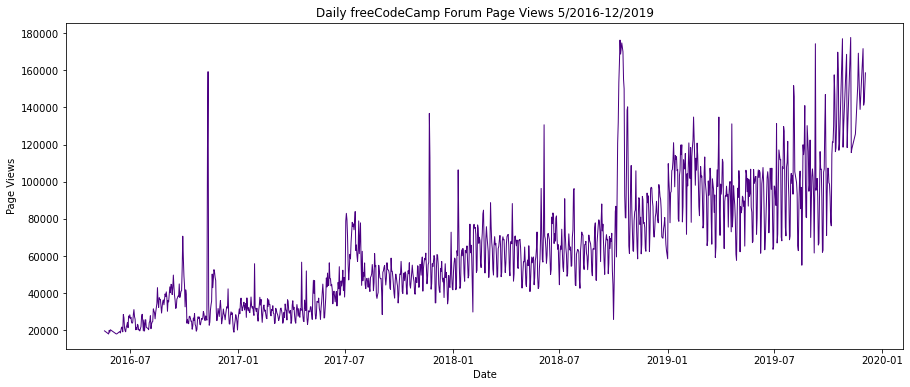

In [65]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(df.index, df['value'], color='indigo', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
fig.savefig('line_plot.png')
plt.show()

#### Drawing the bar plot and saving the figure

It should show average daily page views for each month grouped by year. Copy and modify data for monthly bar plot

In [69]:
list_month=['January','February','March','April','May','June','July','August','September','October','November','December']

In [66]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

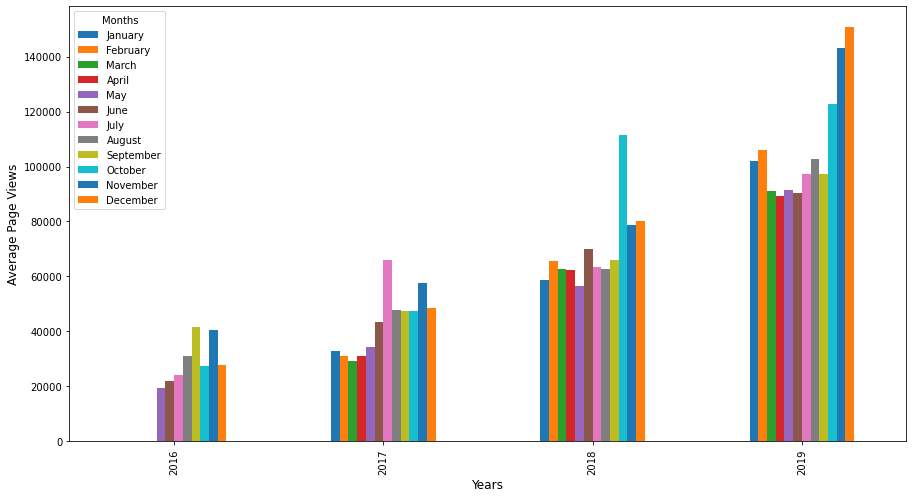

In [78]:
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,8)).figure
plt.xlabel("Years", fontsize= 12)
plt.ylabel("Average Page Views", fontsize= 12)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = months)
fig.savefig('bar_plot.png')
plt.show()

#### Drawing the boxplot and saving the picture

In [79]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

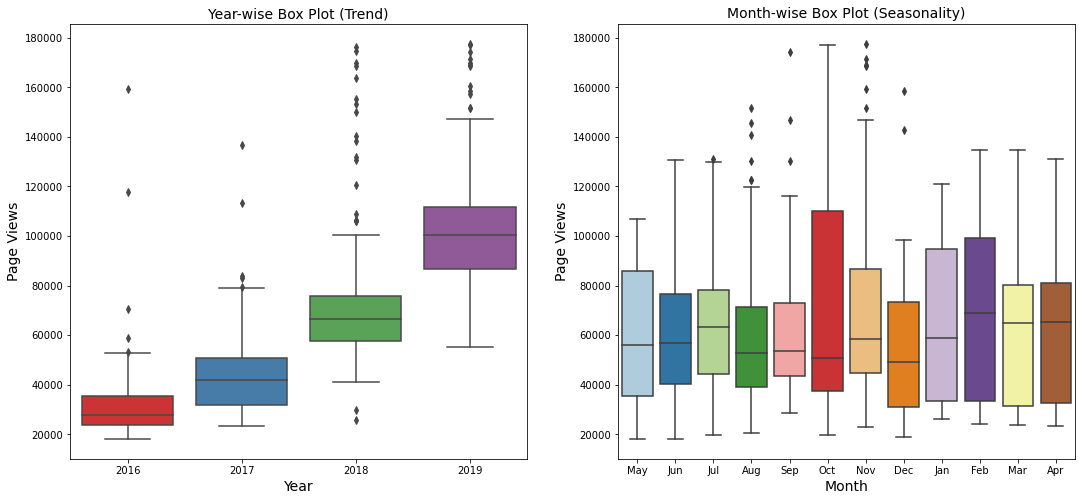

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(8)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1, palette="Set1")
ax1.set_title("Year-wise Box Plot (Trend)", fontsize=14) 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Page Views', fontsize=14)

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2, palette="Paired")
ax2.set_title("Month-wise Box Plot (Seasonality)", fontsize=14)
ax2.set_xlabel('Month', fontsize=14)
ax2.set_ylabel('Page Views', fontsize=14)

plt.show()
